In [1]:
# General imports

from norlabcontrollib.controllers.controller_factory import ControllerFactory
from norlabcontrollib.path.path import Path

import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Init controller

controller_factory = ControllerFactory()
controller = controller_factory.load_parameters_from_yaml('../test/test_parameters_smpc.yaml')

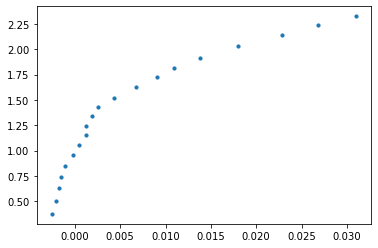

In [3]:
# load test trajectory

test_path_poses = np.load('../traj_a_int.npy')
test_path = Path(test_path_poses)
test_path.compute_metrics(controller.path_look_ahead_distance)
controller.update_path(test_path)

plt.scatter(test_path.poses[:20, 1], test_path_poses[:20, 0], s=10)

prediciton cost :  3.5569481899965076


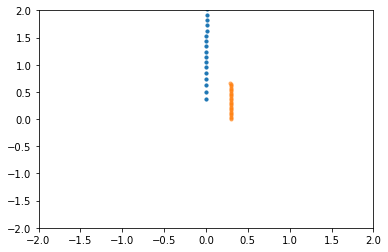

In [6]:
# set initial state, predict initial trajectory

init_state = np.array([0, 0.3, 0])
prediction_cost = controller.compute_command_vector(init_state)

plt.scatter(test_path.poses[:20, 1], test_path_poses[:20, 0], s=10)
plt.scatter(controller.prediction_means[1, :], controller.prediction_means[0, :], s=10, alpha=0.5)

plt.xlim(-2, 2)
plt.ylim(-2, 2)
print('prediciton cost : ', prediction_cost)

In [7]:
# setup

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 60 is different from 2)